#Tugas 5

#Clustering pada dataset iris menggunakan K-Means

**K-Means Clustering** adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

Clustering Algoritma (K-Means) memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [2]:
#source data
dataset_url = "https://raw.githubusercontent.com/AchmadFanyFadheli200411100088/datamining-/main/Iris.csv"
#create dataframe
df = pd.read_csv(dataset_url)

In [3]:
from sklearn.datasets import load_iris
df = load_iris()

#mendefinisikan data dan target sebagai fitur independen dalam dataset
data = df.data
target = df.target
#mengonversi data menjadi dataframe
data = pd.DataFrame(data)
#membuat kolom tambahan dalam data, 'target', dan menempatkan label ke dalamnya
data['target'] = target
data

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Menganalisis target dan memastikan bahwa itu terdiri dari kelas, 0, 1 dan 2, dan setiap kelas terdiri dari 50 contoh

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


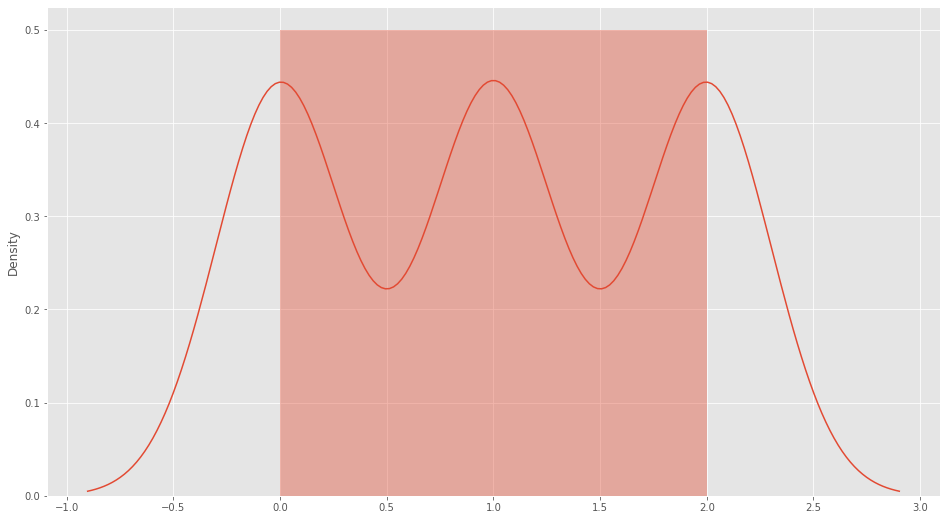

In [4]:
sns.distplot(target)

Selanjutnya membuat data training dan data validation

1. Data training dibuat dengan mengacak data secara acak dan mengambil 90% dari dataframe
2. Data validation dibuat by dropping the examples yang digunakan pada train

In [5]:
train = data.sample(frac=.9, random_state=42)
val = data.drop(train.index)

Kemudian membuat variabel independen dan dependen dalam data training dan data validation, masing-masing menjadi X dan Y

1. X_train terdiri dari semua kolom pada data training kecuali kolom yang terakhir.

2. Y_train terdiri dari kolom terakhir pada data training.

3. X_val terdiri dari semua kolom pada data validation kecuali kolom yang terakhir.

4. Y_val terdiri dari kolom terakhir pada data validation.

In [6]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

X_val = val.iloc[:,:-1]
y_val = val.iloc[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((135, 4), (135,), (15, 4), (15,))

Selanjutnya yaitu memilih algoritma clustering yang akan digunakan dalam program. Pada kasus ini akan menggunakan sklearn’s k-means.

In [7]:
from sklearn.cluster import KMeans
#akan terdiri dari 3 cluster dan kemudian  fitted X_train init ke dalam model
kmeans = KMeans(n_clusters=3).fit(X_train)

In [8]:
kmeans.cluster_centers_

array([[5.91111111, 2.7537037 , 4.39074074, 1.42592593],
       [4.98125   , 3.41666667, 1.4625    , 0.24791667],
       [6.85151515, 3.09090909, 5.76363636, 2.10909091]])

In [9]:
#label dalam model adalah predictions
predictions = kmeans.labels_
predictions

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0,
       0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2,
       1, 2, 1], dtype=int32)

In [10]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 54, 1: 48, 2: 33}

Ada 3 nilai unik di dalam predictions, jadi saya memasukkan nilai-nilai ini dan jumlah frekuensi yang sesuai ke dalam dictionary.

In [11]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(np.equal(y_true, y_pred))/len(y_true)
  return accuracy

acc = accuracy(y_train, predictions)
print("Accuracy: ", acc)

Accuracy:  0.23703703703703705


Kemudian memeriksa keakuratan prediksi terhadap y_train dan menemukan model mencapai akurasi 44%

Selanjutnya plot titik data dan pusat cluster ke dalam grafik untuk memvisualisasikan bagaimana titik data muncul di memori komputer

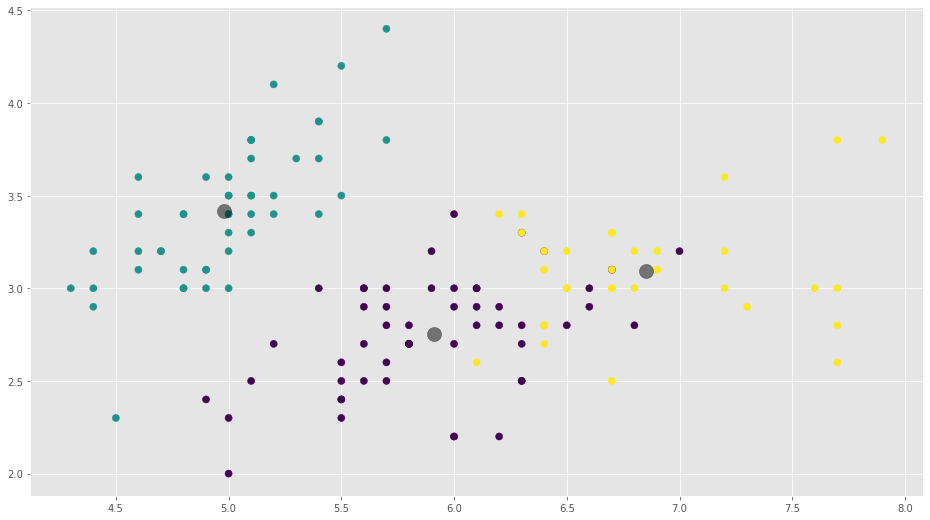

In [12]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=predictions, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)